In [205]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
import numpy as np

In [206]:
dataDict = load_diabetes(scaled=False)
# for key,val in dataDict.items():
#     print(key,val)

dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [207]:
healthDF = pd.DataFrame(dataDict.data, columns=dataDict.feature_names)
healthDF['target'] = dataDict.target
healthDF.info()
healthDF.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0


In [208]:
healthDF[healthDF.columns[[0,1,3,4,6,7,9,10]]] = healthDF[healthDF.columns[[0,1,3,4,6,7,9,10]]].astype('int16')
healthDF.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
1,48,1,21.6,87,183,103.2,70,3,3.8918,69,75
2,72,2,30.5,93,156,93.6,41,4,4.6728,85,141


In [209]:
print(healthDF[healthDF.isna().any(axis=1)])
print(healthDF[healthDF.duplicated()])

Empty DataFrame
Columns: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target]
Index: []
Empty DataFrame
Columns: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target]
Index: []


In [210]:
print(len(healthDF['target'].unique()), healthDF.shape[0])

214 442


In [211]:
corrdf = healthDF.corr()

In [212]:
corrdf.sort_values('target',ascending=False)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
target,0.187889,0.043062,0.586450,0.441618,0.212022,0.174054,-0.394653,0.437806,0.565883,0.382483,1.000000
bmi,0.185085,0.088161,1.000000,0.394879,0.249777,0.261170,-0.366725,0.411076,0.446157,0.388680,0.586450
s5,0.270774,0.149916,0.446157,0.392419,0.515503,0.318357,-0.398476,0.610073,1.000000,0.464669,0.565883
bp,0.333600,0.241318,0.394879,1.000000,0.241805,0.184869,-0.177478,0.260093,0.392419,0.388533,0.441618
s4,0.191031,0.343385,0.411076,0.260093,0.532356,0.648904,-0.730788,1.000000,0.610073,0.400076,0.437806
s6,0.301731,0.208133,0.388680,0.388533,0.325717,0.290600,-0.273697,0.400076,0.464669,1.000000,0.382483
s1,0.260061,0.035277,0.249777,0.241805,1.000000,0.896663,0.051542,0.532356,0.515503,0.325717,0.212022
age,1.000000,0.173737,0.185085,0.333600,0.260061,0.219243,-0.075200,0.191031,0.270774,0.301731,0.187889
s2,0.219243,0.142637,0.261170,0.184869,0.896663,1.000000,-0.196469,0.648904,0.318357,0.290600,0.174054
sex,0.173737,1.000000,0.088161,0.241318,0.035277,0.142637,-0.378988,0.343385,0.149916,0.208133,0.043062


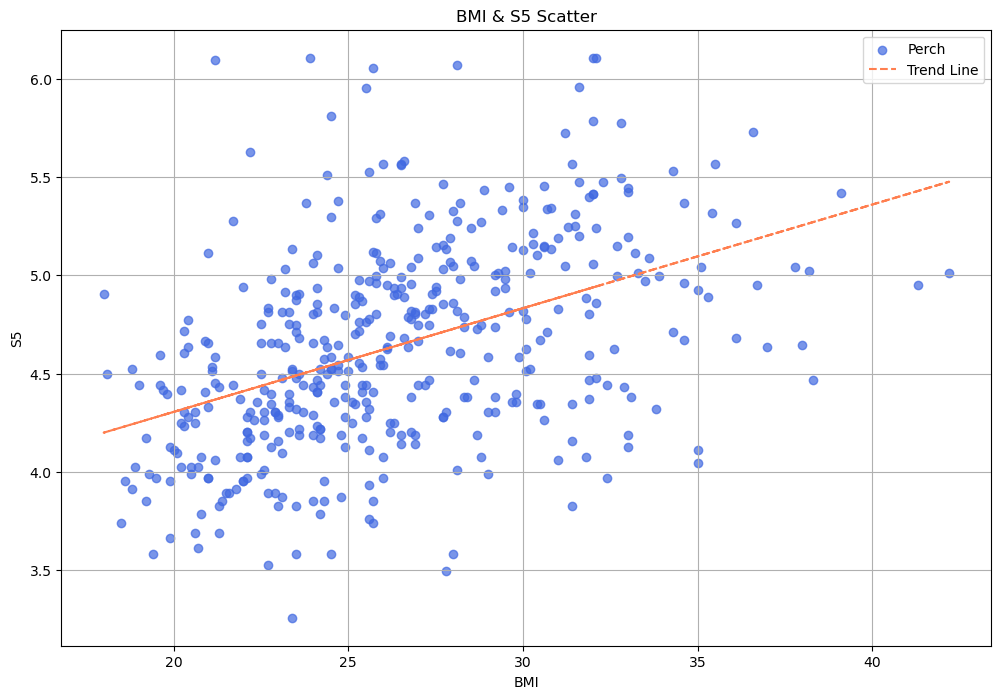

In [213]:
x_sr = np.array(healthDF['bmi'])
y_sr = np.array(healthDF['s5'])

# 1차원 다항식 피팅 (즉, 직선)
slope, intercept = np.polyfit(x_sr, y_sr, 1)

# 트렌드 라인 y 값 계산
trend_line = slope * x_sr + intercept

# Scatter 그리기
plt.figure(figsize=(12,8))
plt.scatter(x_sr,y_sr,label='Perch',alpha=0.7, color='royalblue')
plt.plot(x_sr, trend_line, color='coral', linestyle='--', label='Trend Line')
plt.title('BMI & S5 Scatter')
plt.xlabel('BMI')
plt.ylabel('S5')
plt.legend()
plt.grid()
plt.show()

In [214]:
featureDF = healthDF[['bmi','s5','bp','s4']]
targetDF = healthDF['target']
X_train, X_test, Y_train, Y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    test_size=0.2,
                                                    random_state=10)

print(f'X_train : [shape: {X_train.shape}], [ndim: {X_train.ndim}D]')
print(f'Y_train : [shape: {Y_train.shape}], [ndim: {Y_train.ndim}D]')
print(f'X_test : [shape: {X_test.shape}], [ndim: {X_test.ndim}D]')
print(f'Y_test : [shape: {Y_test.shape}], [ndim: {Y_test.ndim}D]')

X_train : [shape: (353, 4)], [ndim: 2D]
Y_train : [shape: (353,)], [ndim: 1D]
X_test : [shape: (89, 4)], [ndim: 2D]
Y_test : [shape: (89,)], [ndim: 1D]


In [226]:
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
X_train


,bmi,s5,bp,s4
0,31.9,4.5951,78,5
1,33.8,4.3175,123,4
2,24.1,4.4067,87,4
3,33.1,4.3820,117,4
4,29.5,5.0239,97,5
...,...,...,...,...
348,29.9,4.5850,83,4
349,29.2,5.0039,93,6
350,24.7,5.0370,118,7
351,25.6,5.5255,94,4


In [216]:
mmScaler = MinMaxScaler()

mmScaler.fit(X_train,Y_train)
print('[스케일러 데이터]')
print(f'min: {mmScaler.min_}, '
    f'scale: {mmScaler.scale_}, '
    f'min: {mmScaler.data_min_}, '
    f'max: {mmScaler.data_max_}, ')

X_train_scaled = mmScaler.transform(X_train)
X_test_scaled = mmScaler.transform(X_test)

[스케일러 데이터]
min: [-0.74380165 -1.14363439 -0.87323944 -0.28571429], scale: [0.04132231 0.35101267 0.01408451 0.14285714], min: [18.      3.2581 62.      2.    ], max: [ 42.2     6.107 133.      9.   ], 


In [217]:
model = KNeighborsRegressor()
model.fit(X_train_scaled,Y_train)

KNeighborsRegressor()

In [218]:
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(4, 353, 'euclidean', {})

In [219]:
scores = {}
for k in range(1, model.n_samples_fit_+1):
    model.n_neighbors=k

    score=model.score(X_test_scaled,Y_test)

    scores[k]=score
best_k=sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]

In [220]:
scores

{1: -0.020539089839824554,
 2: 0.2102520050214397,
 3: 0.31490782538200246,
 4: 0.29258261473941183,
 5: 0.337058017177589,
 6: 0.39535447435820104,
 7: 0.41102740936748505,
 8: 0.4268806571095257,
 9: 0.4115881140212355,
 10: 0.4223933129869164,
 11: 0.43402499942384054,
 12: 0.45291414703831634,
 13: 0.4505188456279473,
 14: 0.463021174426413,
 15: 0.4513535254556402,
 16: 0.4571669246678527,
 17: 0.45424243628779937,
 18: 0.4447213117237575,
 19: 0.44479284658148155,
 20: 0.4466105202937737,
 21: 0.4535026267553679,
 22: 0.45279863577165413,
 23: 0.45778216921904613,
 24: 0.46493164257794484,
 25: 0.45761072339105513,
 26: 0.4649706982364866,
 27: 0.46306404055951267,
 28: 0.4632692147740278,
 29: 0.4629035133719498,
 30: 0.45873908294189725,
 31: 0.454073255704346,
 32: 0.4525889431048975,
 33: 0.45600197809320064,
 34: 0.45392880682487824,
 35: 0.4488182924632178,
 36: 0.44790109582584203,
 37: 0.44846519183167477,
 38: 0.45152163303822823,
 39: 0.44919474145580063,
 40: 0.4457225

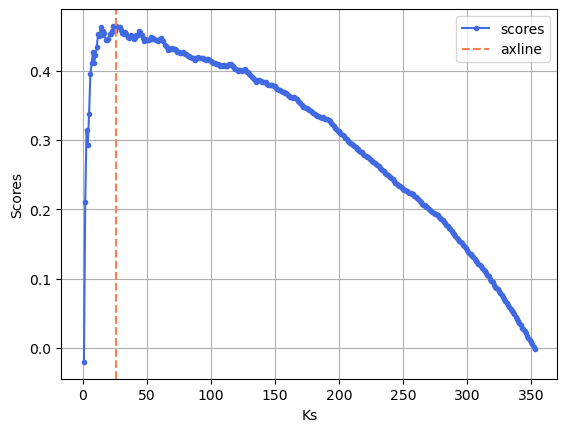

In [221]:
x_list = list(scores.keys())
y_list = list(scores.values())
plt.plot(x_list,y_list,color='royalblue',marker='.', label='scores')
plt.ylabel('Scores')
plt.xlabel('Ks')
plt.axvline(best_k, 0, 1, color='coral', linestyle='--', label='axline')
plt.legend()
plt.grid()
plt.show()

In [222]:
model.n_neighbors = best_k

In [238]:
new_data = [[30,4.2531,87,4]]
new_data_scaled = mmScaler.transform(new_data)
print(model.predict(new_data_scaled))

[129.23076923]


c:\Users\KDP-38\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [237]:
distance, index = model.kneighbors(new_data_scaled)
print(distance,index,sep='\n')

[[0.08355795 0.09684227 0.12947415 0.12999008 0.14996148 0.150473
  0.16013039 0.17108919 0.17753638 0.18795146 0.20073481 0.20206838
  0.20439409 0.20560191 0.20578129 0.2067828  0.20886953 0.20925321
  0.21001345 0.21318968 0.21348757 0.21437673 0.21482124 0.21804119
  0.22004857 0.22128513]]
[[265 136 348 342 271 200 225  65 235  36 173  52  97 272 305 164 332 344
   19 293 160  50  29 258 109 269]]
